GPU


# **Carregando a imagem**



In [1]:
import cv2
from google.colab.patches import cv2_imshow

In [2]:
imagem = cv2.imread('imagem.jpg')
imagem.shape

(358, 476, 3)

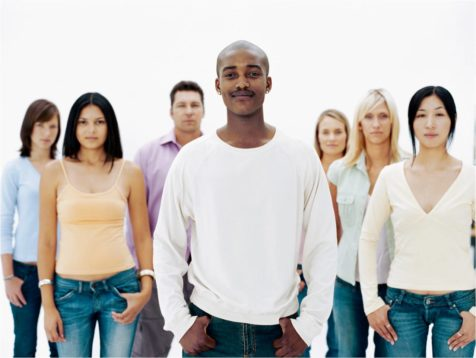

In [3]:
cv2_imshow(imagem)

In [4]:
cv2.resize(imagem,(400,600));


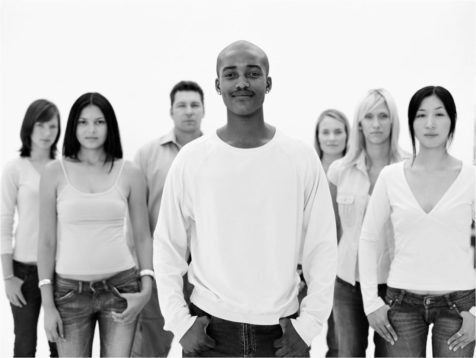

In [5]:
imagem_grey = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_grey);

# **Detecção**

## Classificador haarcascade

In [6]:
imagem = cv2.imread('imagem.jpg')
imagem_grey = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

In [7]:
detector_facial  = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [8]:
deteccoes = detector_facial.detectMultiScale(imagem_grey,minNeighbors=5,scaleFactor=1.05)#scaleFactor é a escala da imagem sempre>1
deteccoes                                                #minNeighbors=x algoritmo escolhe entre x valores o melhor 
                                                         #minSize = tamanho minimo do segmento
                                                         #maxSize = tamanho maximo do segmento


array([[211,  50,  62,  62],
       [168,  90,  41,  41],
       [ 70, 107,  43,  43],
       [ 29, 114,  33,  33],
       [355, 102,  41,  41],
       [314, 119,  35,  35],
       [407,  97,  48,  48]], dtype=int32)

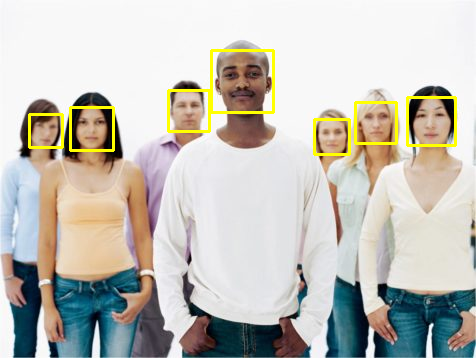

In [9]:
for x,y,w,h in deteccoes:
  cv2.rectangle(imagem,(x,y),(x+h,y+h),(0,255,255),2)
cv2_imshow(imagem);

## HOG (Histrograms of Oriented Gradients)

In [10]:
import dlib
imagem = cv2.imread('imagem.jpg')

In [11]:
detector_face_hog = dlib.get_frontal_face_detector()

In [12]:
x=2 # valor de escala da imagem, maior == melhor porem +lento
deteccoes = detector_face_hog(imagem,x)

In [13]:
deteccoes, len(deteccoes)

(rectangles[[(411, 105) (451, 145)], [(216, 62) (264, 110)], [(75, 113) (108, 146)], [(171, 94) (205, 128)], [(313, 120) (346, 154)], [(357, 106) (391, 139)]],
 6)

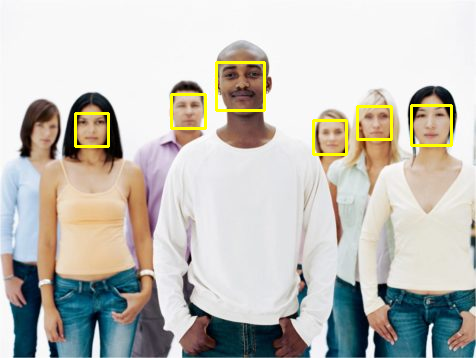

In [14]:
for face in deteccoes:
  l,t,r,b = face.left(),face.top(),face.right() , face.bottom()
  cv2.rectangle(imagem, (l, t), (r, b), (0,255,255), 2)
cv2_imshow(imagem)

## CNN

In [18]:
import dlib
imagem = cv2.imread('imagem.jpg')
detector_face_cnn = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat') #caminho do modelo ja treinado

In [19]:
x=2 # valor de escala da imagem, maior == melhor porem +lento
deteccoes = detector_face_cnn(imagem, x)

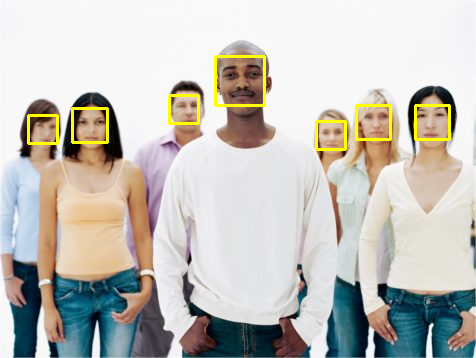

In [21]:
for face in deteccoes:
  l,t,r,b = face.rect.left(),face.rect.top(),face.rect.right() , face.rect.bottom()
  cv2.rectangle(imagem, (l, t), (r, b), (0,255,255), 2)
cv2_imshow(imagem)